<table>
    <tr>
        <td style="text-align:left">
            <img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR9ItLTT_F-3Q30cu7ZCCoKmuFGBt22pe7pNA" alt="Logo Universidad" width="300"/>
        </td>
        <td>
            Departamento de Ciencias de la Computación y de la Decisión<br>
            Facultad de Minas<br>
            Universidad Nacional de Colombia<br>
            Optimizacion e IA 2024-2S<br><br>
            Docente: Maria Constanza Torres Madronero<br>
            <br>
            Contribuciones a la guia por: <br>
            - Deimer Miranda Montoya (2023)<br>
            - Luis Fernando Becerra Monsalve (2024)
        </td>    
    </tr>
</table>

# **Regresion usando Random Forest**

In [2]:
#Importamos algunas de las librerias a usar
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd


In [3]:
#Cargar los datos - vamos a usar los datos diabetes disponibles
#en la libreria sklearn.
diabetes = datasets.load_diabetes()

#Exploremos las diferentes caracteristicas dispoibles
print(diabetes.feature_names)
#Revisemos los valores objetivo
#Nota que los valores en este caso valore reales (no categorias como
#en el caso de clasificacion)
print(diabetes.target)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
[151.  75. 141. 206. 135.  97. 138.  63. 110. 310. 101.  69. 179. 185.
 118. 171. 166. 144.  97. 168.  68.  49.  68. 245. 184. 202. 137.  85.
 131. 283. 129.  59. 341.  87.  65. 102. 265. 276. 252.  90. 100.  55.
  61.  92. 259.  53. 190. 142.  75. 142. 155. 225.  59. 104. 182. 128.
  52.  37. 170. 170.  61. 144.  52. 128.  71. 163. 150.  97. 160. 178.
  48. 270. 202. 111.  85.  42. 170. 200. 252. 113. 143.  51.  52. 210.
  65. 141.  55. 134.  42. 111.  98. 164.  48.  96.  90. 162. 150. 279.
  92.  83. 128. 102. 302. 198.  95.  53. 134. 144. 232.  81. 104.  59.
 246. 297. 258. 229. 275. 281. 179. 200. 200. 173. 180.  84. 121. 161.
  99. 109. 115. 268. 274. 158. 107.  83. 103. 272.  85. 280. 336. 281.
 118. 317. 235.  60. 174. 259. 178. 128.  96. 126. 288.  88. 292.  71.
 197. 186.  25.  84.  96. 195.  53. 217. 172. 131. 214.  59.  70. 220.
 268. 152.  47.  74. 295. 101. 151. 127. 237. 225.  81. 151. 107.  64.
 138. 185. 26

In [4]:
#Organizamos los datos en un DataFrame de panda
#Vamos usar las primeras cuatro caracteristicas
data = pd.DataFrame(
    {
        'age': diabetes.data[:, 0],
        'sex': diabetes.data[:, 1],
        'bmi': diabetes.data[:, 2],
        'bp':  diabetes.data[:, 3],
        'diabetes': diabetes.target
    }
)

In [5]:
#Muestras
X = data[['age', 'sex', 'bmi', ]]
#Valor a estimar
y = data['diabetes']
#Seleccionamos 70% de muestras para entrenamiento y 30% para prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3

In [ ]:
# Explore la regresion basada en Random Forest empleando parametros fijos
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor(
    n_estimators=20,
    max_depth=2,
    random_state=0,
)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=0)

In [8]:
# Similar al caso de la clasificacion, una vez entrenado el modelo, predecimos los valores
y_pred = RF.predict(X_test)

In [10]:
#En regresion tenemos diferentes metricas que podemos usar para evaluar el desempeño
print("MAE: ", metrics.mean_absolute_error(y_test, y_pred))
print("MSE: ", metrics.mean_squared_error(y_test, y_pred))
#Una de las metricas mas empleadas es R2 score
print("R2: ", metrics.r2_score(y_test, y_pred))

MAE:  52.40810050495477
MSE:  4188.066196051345
R2:  0.2322787111487692


In [11]:
#Que pasa cuando modificamos los parametros?

RF = RandomForestRegressor(
    n_estimators=90,
    max_depth=5,
    random_state=0,
)

RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=90, random_state=0)

In [12]:
#Volvemos a predecir la salida para los datos de prueba

#Evaluamos el desempeño
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("R2: ", metrics.r2_score(y_test,y_pred))

MAE:  52.40810050495477
MSE:  4188.066196051345
R2:  0.2322787111487692


In [15]:
# Vamos a seleccionar los hiperparametros de nuestro Random Forest
# empleando la busqueda de grilla.
from sklearn.model_selection import GridSearchCV
import numpy as np

# Creamos la grilla con los parametros a seleccionar
param_grid = {
    'n_estimators': np.arange(10, 210, 10,),
    'max_depth': [3, 5, 10, 20, ],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse',],
}

# Defimos el modelo base
base_estimator = RandomForestRegressor(random_state=0, )

# Realizamos la busqueda de los hiperparametros
RF_gridSearch = GridSearchCV(base_estimator, param_grid,)
RF_gridSearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(random_state=0),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse'],
                         'max_depth': [3, 5, 10, 20],
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [16]:
#Podemos ver que parametros fueron los seleccionados
RF_gridSearch.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'n_estimators': np.int64(200)}

In [17]:
#Evaluamos el desempeño
y_pred = RF_gridSearch.best_estimator_.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("R2:  ", metrics.r2_score(y_test,y_pred))

MAE:  52.77899928195221
MSE:  4116.840164327719
R2:   0.2453352719371772


In [18]:
#Ahora, vamos a seleccionar los hiperparametros empleando busqueda aleatoria
from sklearn.model_selection import RandomizedSearchCV

# Creamos la grilla con los parametros a seleccionar
param_grid = {
    'n_estimators': np.arange(10, 210, 10,),
    'max_depth': [3, 5, 10, 20, ],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse',],
}

# Defimos el modelo base
base_estimator = RandomForestRegressor(random_state=0, )

# Realizamos la busqueda de los hiperparametros
RF_randomSearch = RandomizedSearchCV(base_estimator, param_grid,n_iter=15)
RF_randomSearch.fit(X_train, y_train)

#Creamos la grilla de hiperparametros, entre las cuales se seleccionara de forma
#aleatoria la mejor configuracion

#Defimos el modelo base

#Realizamos la busqueda de los hiperparametros



RandomizedSearchCV(estimator=RandomForestRegressor(random_state=0), n_iter=15,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200])})

In [19]:
#Revisamos los parametros seleccionados
RF_randomSearch.best_params_

{'n_estimators': np.int64(170), 'max_depth': 3, 'criterion': 'friedman_mse'}

In [20]:
#Evaluamos el desempeño
y_pred = RF_randomSearch.best_estimator_.predict(X_test)
print("MAE: ", metrics.mean_absolute_error(y_test,y_pred))
print("MSE: ", metrics.mean_squared_error(y_test,y_pred))
print("R2:  ", metrics.r2_score(y_test,y_pred))

MAE:  52.70309939679933
MSE:  4109.2317778628685
R2:   0.24672997774874728


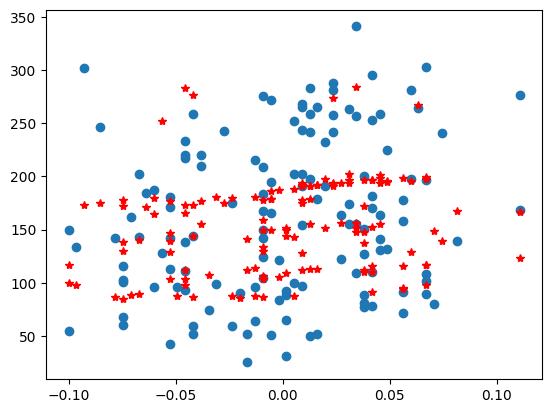

In [21]:
import matplotlib.pyplot as plt

#Analicemos nuestra estimacion desde una de las caracteristicas
plt.plot(X_test[['age']],y_test,'o')
plt.plot(X_test[['age']],y_pred,'*r')

# Ejercicios practicos
1. Explore la clasificación usando RandomForest de los datos Digits (sklearn.datasets.load_digits), la cual incluye 180 imagenes (8x8) de los digitos del 0 al 10. Optimice los hiperparametros, presente tanto la precisión general de clasificación como la matriz de confusión.
2. Explore la regresion usando RandomForest de los datos California Housing (sklearn.datasets.fetch_california_housing). Este dataset busca estimar el valor de una vivienda a partir de 8 caracteristicas. Optimize los hiperparametros y compare las diferentes metricas de desempeño.
